# 03_EDA_and_Visualization notebook

**The objective of this notebook is to perform Exploratory Data Analysis (EDA) and Data Visualization on the full autonomous vehicle disengagement reports data from 2021 to 2023.**

## 1. Imports

In [1]:
# !pip install wordcloud 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

from wordcloud import WordCloud

from collections import Counter

## 2. Read CSVs

In [3]:
reports_full = pd.read_csv('../data/reports_full.csv')

In [4]:
reports_full.head()

,manufacturer,permit_number,date,vin,capable_without_driver,driver_present,disengagement_initiated_by,disengagement_location,disengagement_description,incident_day_of_week,incident_month
0,aimotive inc.,AVT036,2022-12-06 00:00:00,4T1B21HK6KU514747,No,Yes,"test driver, av system",freeway,Safety Driver disengaged autonomous mode upon ...,Tuesday,December
1,aimotive inc.,AVT036,2022-12-06 00:00:00,4T1B21HK3KU514477,No,Yes,"test driver, av system",freeway,Safety Driver disengaged autonomous mode due d...,Tuesday,December
2,aimotive inc.,AVT036,2022-12-08 00:00:00,4T1B21HK6KU514747,No,Yes,"test driver, av system",freeway,Safety Driver disengaged autonomous mode due t...,Thursday,December
3,aimotive inc.,AVT036,2022-12-08 00:00:00,4T1B21HK6KU514747,No,Yes,"test driver, av system",freeway,Safety Driver disengaged autonomous mode upon ...,Thursday,December
4,aimotive inc.,AVT036,2022-12-08 00:00:00,4T1B21HK3KU514477,No,Yes,"test driver, av system",highway,Safety Driver disengaged autonomous mode as a ...,Thursday,December


In [5]:
reports_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17454 entries, 0 to 17453
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   manufacturer                17454 non-null  object
 1   permit_number               17454 non-null  object
 2   date                        17454 non-null  object
 3   vin                         17454 non-null  object
 4   capable_without_driver      17454 non-null  object
 5   driver_present              17454 non-null  object
 6   disengagement_initiated_by  17454 non-null  object
 7   disengagement_location      17454 non-null  object
 8   disengagement_description   17454 non-null  object
 9   incident_day_of_week        17454 non-null  object
 10  incident_month              17454 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB


## 3A. Distribution of Disengagement By Location

In [6]:
#create frequencies of each data columns using value_counts()
disengagement_locations_frequency = reports_full['disengagement_location'].value_counts()
disengagement_initiator_frequency = reports_full['disengagement_initiated_by'].value_counts()
disengagement_manufacturer_frequency = reports_full['manufacturer'].value_counts()

Calculate the proportion of autonomous vehicle disengagements for each manufacturer, normalizes these values, and plots them as a bar chart to visually compare the disengagements distribution by manufacturers. 

In [7]:
# Convert the Series to a DataFrame and rename the columns
disengagement_locations_frequency = disengagement_locations_frequency.reset_index()
disengagement_locations_frequency.columns = ['location', 'disengagements_count']

# Calculate the total number of disengagements
total_disengagements = disengagement_locations_frequency['disengagements_count'].sum()

# Calculate the percentage of disengagements for each manufacturer, add as a new data column to the dataframe
disengagement_locations_frequency['percentage'] = disengagement_locations_frequency['disengagements_count'] / total_disengagements

# Sort by asccending order to show in frequency distribution plot later
disengagement_locations_frequency = disengagement_locations_frequency.sort_values(by='percentage', ascending=False)

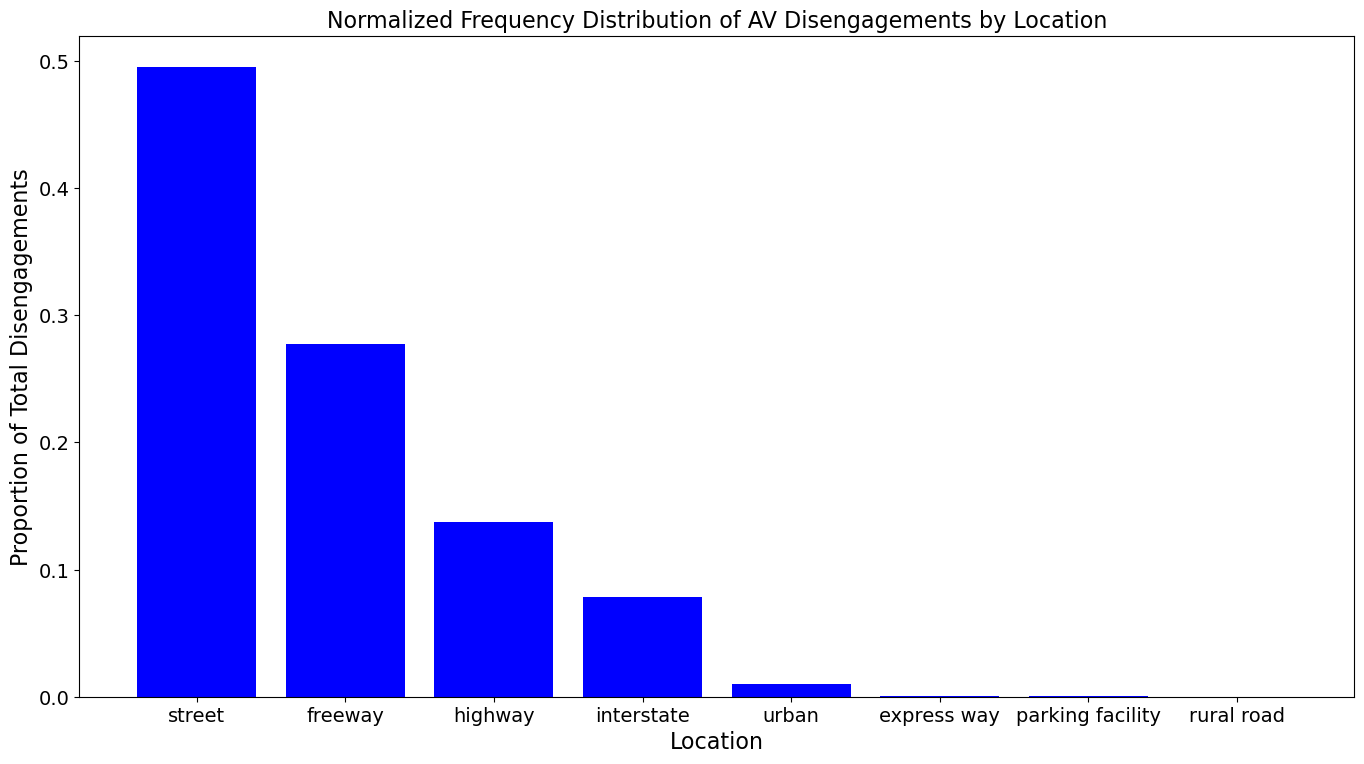

In [8]:
# Plotting the normalized frequency distribution of disengagements by manufacturer
plt.figure(figsize=(14, 8))
plt.bar(disengagement_locations_frequency['location'], disengagement_locations_frequency['percentage'], color='blue')
plt.title('Normalized Frequency Distribution of AV Disengagements by Location', fontsize=16)
plt.ylabel('Proportion of Total Disengagements', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Location', fontsize=16)
plt.tight_layout(pad=2.0)
plt.savefig('../images/disengagements_by_location_normalized.png')

In [9]:
disengagement_locations_frequency

,location,disengagements_count,percentage
0,street,8641,0.495073
1,freeway,4849,0.277816
2,highway,2403,0.137676
3,interstate,1365,0.078206
4,urban,176,0.010084
5,express way,13,0.000745
6,parking facility,6,0.000344
7,rural road,1,0.000057


## 3B. Distribution of Disengagement By Initiator

Create the same proportional distribution of AV disengagements plot by Initiator.

In [10]:
# Convert the Series to a DataFrame and rename the columns
disengagement_initiator_frequency = disengagement_initiator_frequency.reset_index()
disengagement_initiator_frequency.columns = ['initiator', 'disengagements_count']

# Calculate the total number of disengagements
total_disengagements = disengagement_initiator_frequency['disengagements_count'].sum()

# Calculate the percentage of disengagements for each manufacturer, add as a new data column to the dataframe
disengagement_initiator_frequency['percentage'] = disengagement_initiator_frequency['disengagements_count'] / total_disengagements

# Sort by asccending order to show in frequency distribution plot later
disengagement_initiator_frequency = disengagement_initiator_frequency.sort_values(by='percentage', ascending=False)

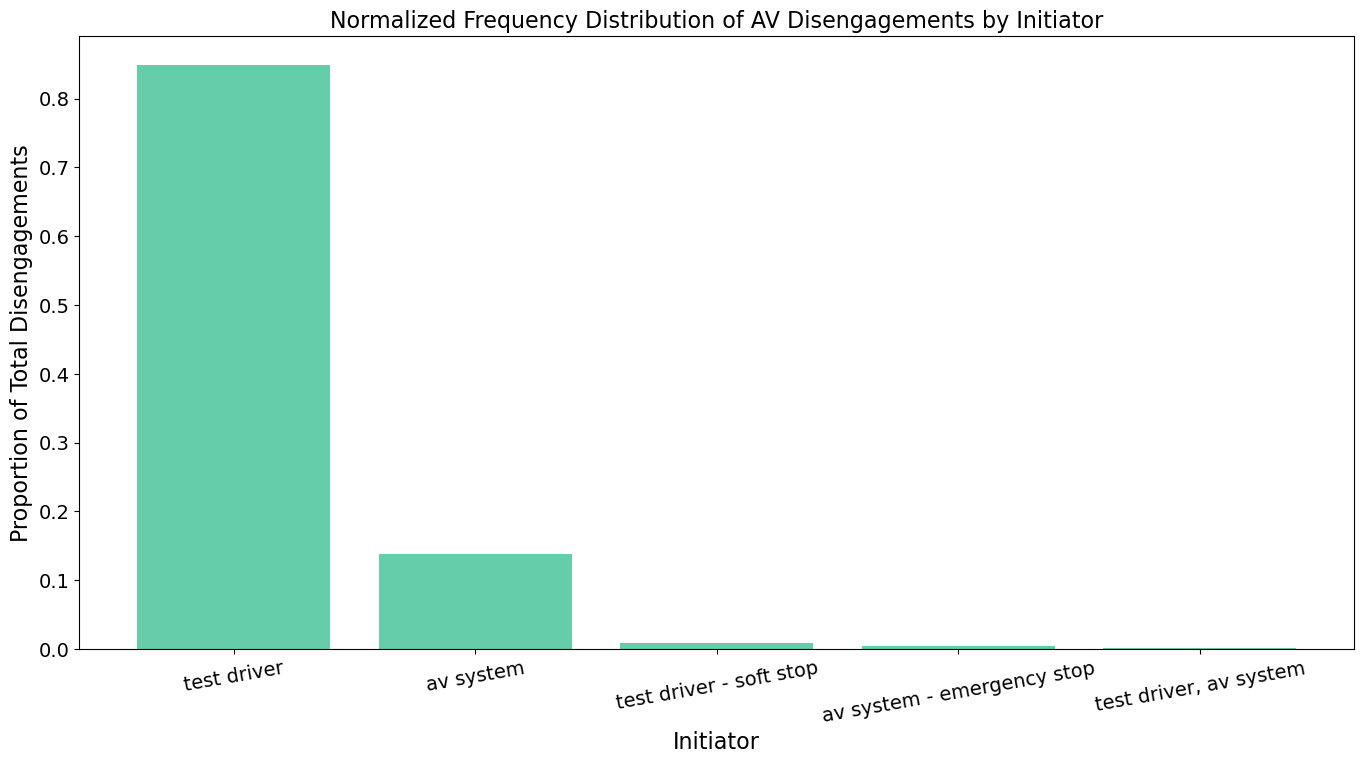

In [11]:
# Plotting the normalized frequency distribution of disengagements by manufacturer
plt.figure(figsize=(14, 8))
plt.bar(disengagement_initiator_frequency['initiator'], disengagement_initiator_frequency['percentage'], color='mediumaquamarine')
plt.title('Normalized Frequency Distribution of AV Disengagements by Initiator', fontsize=16)
plt.ylabel('Proportion of Total Disengagements', fontsize=16)
plt.xticks(rotation = 10, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Initiator', fontsize=16)
plt.tight_layout(pad=2.0)
plt.savefig('../images/disengagements_by_initiator_normalized.png')

In [12]:
disengagement_initiator_frequency

,initiator,disengagements_count,percentage
0,test driver,14812,0.848631
1,av system,2399,0.137447
2,test driver - soft stop,151,0.008651
3,av system - emergency stop,71,0.004068
4,"test driver, av system",21,0.001203


## 3C. Distribution of Disengagement By Manufacturers

Calculate the proportion of autonomous vehicle disengagements for each manufacturer, normalizes these values, and plots them as a bar chart to visually compare the disengagements distribution by manufacturers. 

In [13]:
# Convert the Series to a DataFrame and rename the columns
disengagement_manufacturer_frequency = disengagement_manufacturer_frequency.reset_index()
disengagement_manufacturer_frequency.columns = ['manufacturer', 'disengagements_count']

# Calculate the total number of disengagements
total_disengagements = disengagement_manufacturer_frequency['disengagements_count'].sum()

# Calculate the percentage of disengagements for each manufacturer, add as a new data column to the dataframe
disengagement_manufacturer_frequency['percentage'] = disengagement_manufacturer_frequency['disengagements_count'] / total_disengagements

# Sort by asccending order to show in frequency distribution plot later
disengagement_manufacturer_frequency = disengagement_manufacturer_frequency.sort_values(by='percentage', ascending=False)

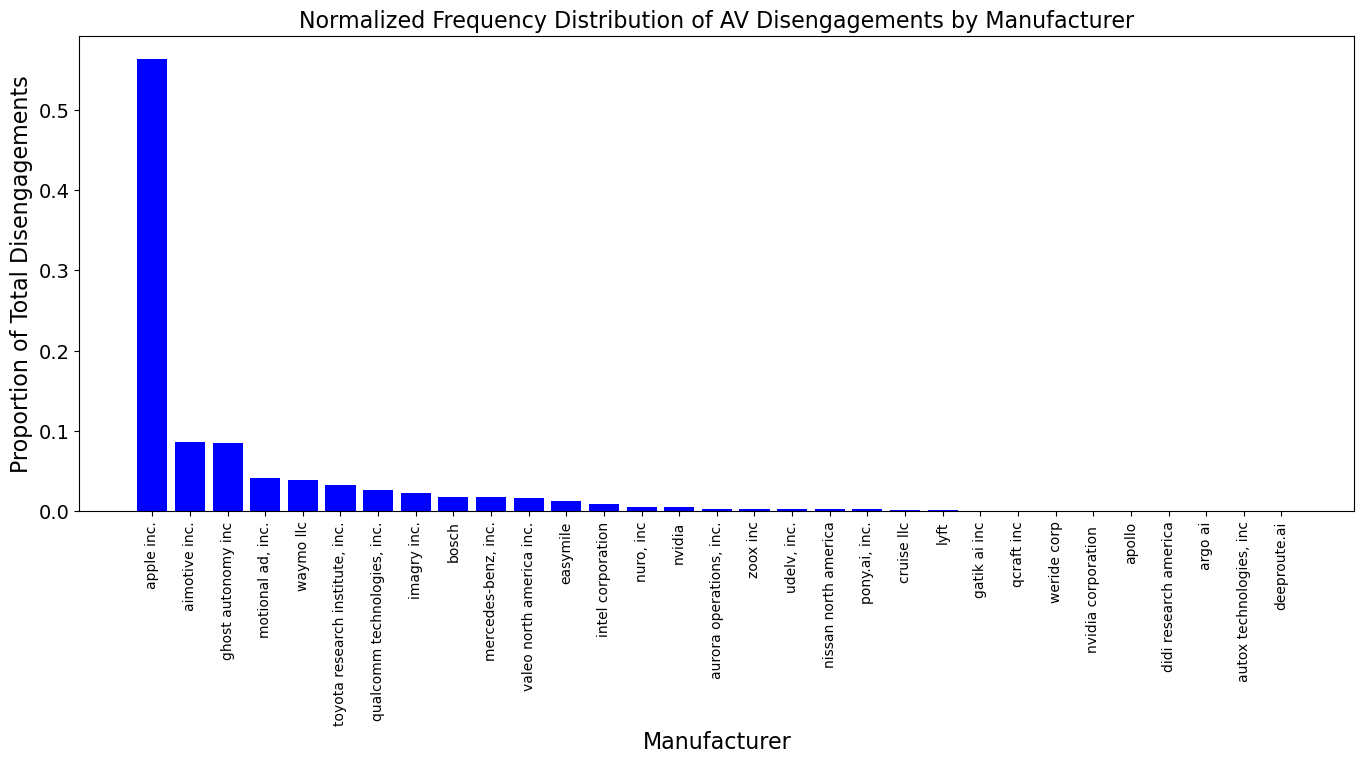

In [14]:

# Plotting the normalized frequency distribution of disengagements by manufacturer
plt.figure(figsize=(14, 8))
plt.bar(disengagement_manufacturer_frequency['manufacturer'], disengagement_manufacturer_frequency['percentage'], color='blue')
plt.title('Normalized Frequency Distribution of AV Disengagements by Manufacturer', fontsize=16)
plt.ylabel('Proportion of Total Disengagements', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
plt.xlabel('Manufacturer', fontsize=16)
plt.tight_layout(pad=2.0)
plt.savefig('../images/disengagements_by_manufacturer_normalized.png')


In [15]:
disengagement_manufacturer_frequency

,manufacturer,disengagements_count,percentage
0,apple inc.,9839,0.563710
1,aimotive inc.,1494,0.085596
2,ghost autonomy inc,1482,0.084909
3,"motional ad, inc.",728,0.041710
4,waymo llc,674,0.038616
5,"toyota research institute, inc.",573,0.032829
6,"qualcomm technologies, inc.",468,0.026813
7,imagry inc.,399,0.022860
8,bosch,314,0.017990
9,"mercedes-benz, inc.",310,0.017761


## 4. Disengagement occurrences by date

create Pivot Tables to analyze the day of the week and month in which the vehicle disengagements occurred.
source: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

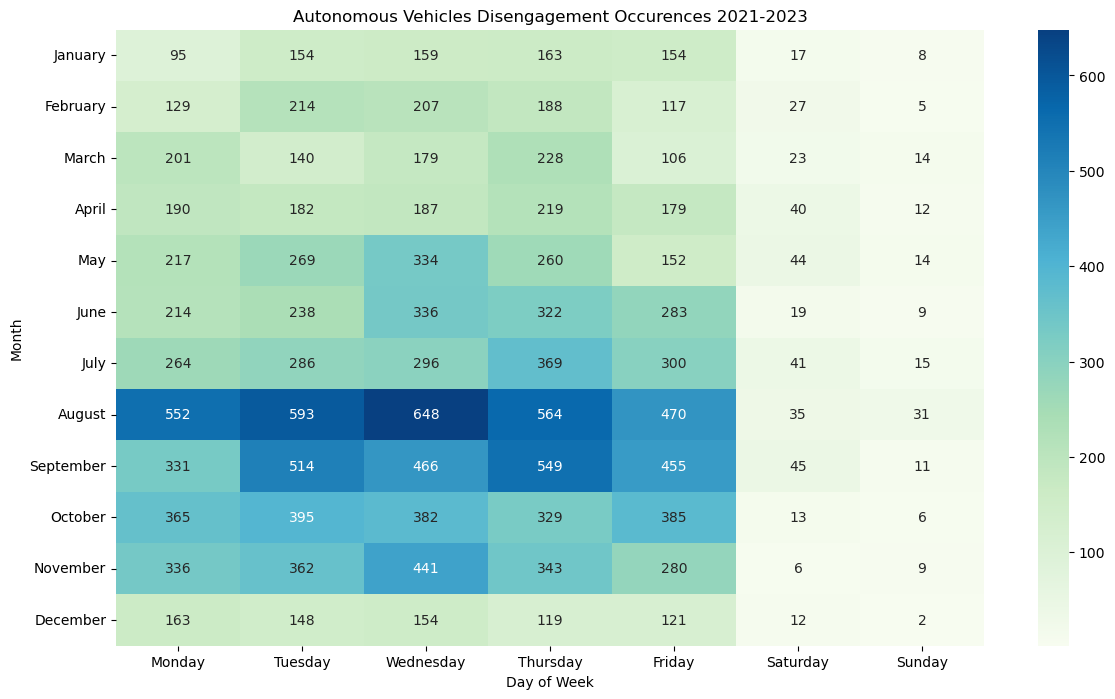

In [16]:
# Grouping data to count disengagements
reports_full_counts = reports_full.pivot_table(columns='incident_day_of_week', index ='incident_month', values='disengagement_description', aggfunc='count')

#This is the order that I want for the rows and columns in the pivot table:
column_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
row_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

reports_full_counts = reports_full_counts.reindex(index=row_order, columns=column_order)

plt.figure(figsize=(14, 8))
sns.heatmap(reports_full_counts, annot=True, fmt='d', cmap='GnBu')
plt.title('Autonomous Vehicles Disengagement Occurences 2021-2023')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.savefig('../images/pivot_table_disengagements.png')

## 5. Most Frequent Words

Use CountVectorizer to count the number of times a word appears in the disengagement description, plot the top 50 bigrams and create a word cloud.
source for word cloud: https://www.datacamp.com/tutorial/wordcloud-python

In [17]:
custom_stop_words = ENGLISH_STOP_WORDS.union({'safety'})

In [18]:
countvect = CountVectorizer(
    max_features=50,
    ngram_range=(1,3),
    stop_words= list(custom_stop_words)
)

In [19]:
reports_description_vectorized = countvect.fit_transform(reports_full['disengagement_description'])

In [20]:
# Convert matrix to a dense format and sum occurrences
reports_word_counts = reports_description_vectorized.sum(axis=0)
reports_word_counts = [(word, reports_word_counts[0, idx]) for word, idx in countvect.vocabulary_.items()]

# Sort the word counts by frequency
reports_word_counts_sorted = sorted(reports_word_counts, key=lambda x: x[1], reverse=True)

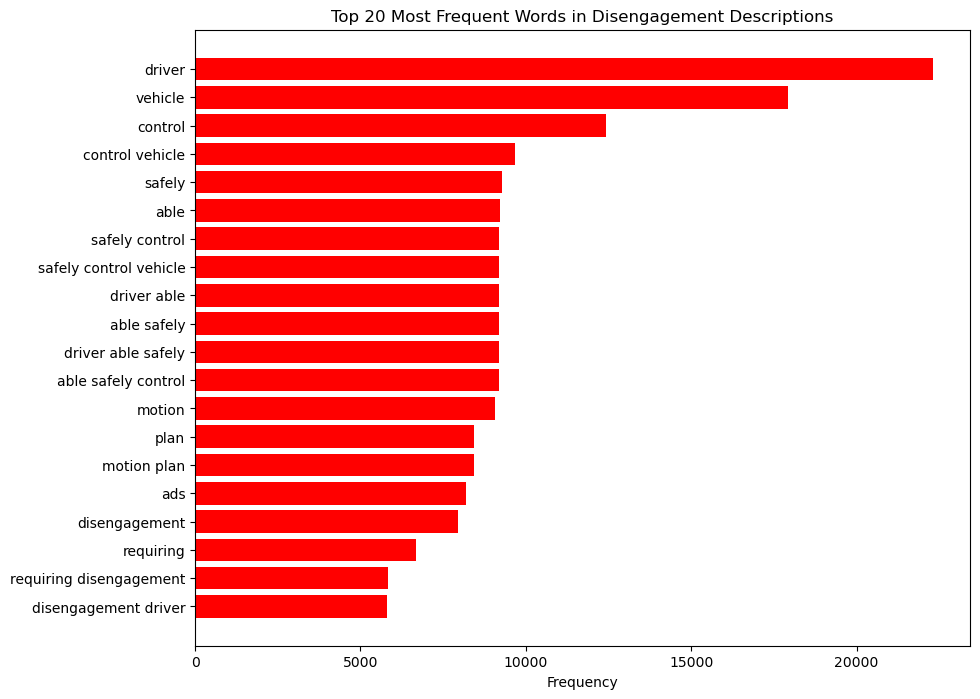

In [21]:
# Get top 20 words
reports_top_words = reports_word_counts_sorted[:20]

# Unzip the words and their counts
words, counts = zip(*reports_top_words)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='red')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words in Disengagement Descriptions')
plt.gca().invert_yaxis()  # make sure to show the most frequent words on top
plt.savefig('../images/top20words_disengagements.png')

## 6. Top 50 Bigrams Word Clouds

#create a word cloud of the top 50 most frequent words in the disengagement description.

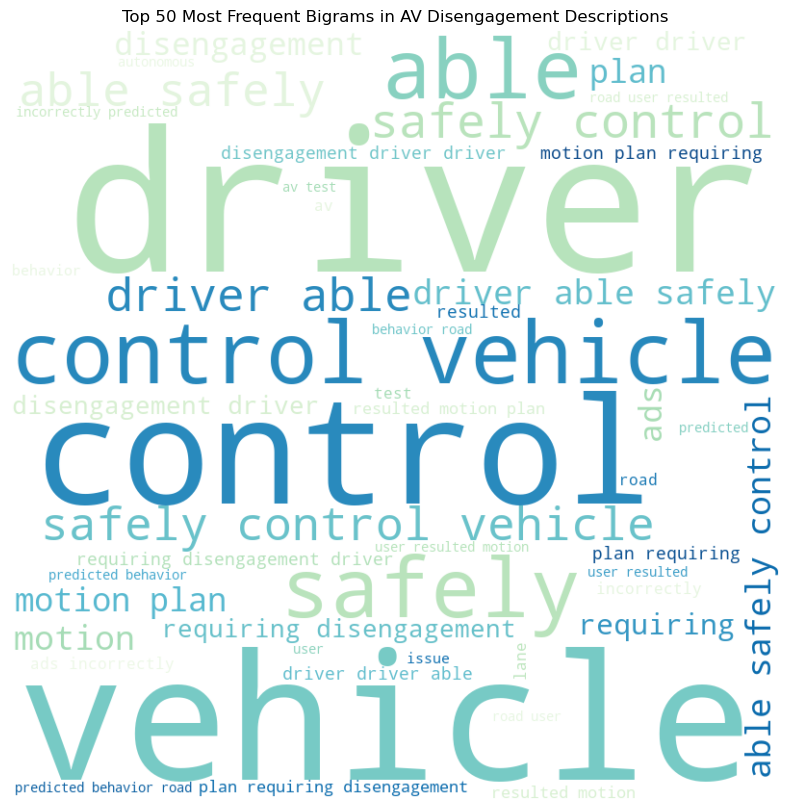

In [22]:
# Convert list of words and counts back into a dictionary for WordCloud
disengagement_word_freq = dict(reports_word_counts_sorted)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='GnBu').generate_from_frequencies(disengagement_word_freq)

# Display the generated image:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Top 50 Most Frequent Bigrams in AV Disengagement Descriptions')
plt.savefig('../images/top50_bigrams_wordcloud_disengagements.png')

## 7. Disengagement manual classifification

The disengagement reports dataset contain the description of each disengagement occurences but not does categorize the primary categorization/classification of the disengagement cause. This task is suitable for a multi-class text classification model to efficiently and effectively classify AV disengagements based on the description. In this study, I am focusing on the disengagement descriptions only as a proof of concept, but future studies can also incorporate available data in the disengagements report such as disengagement initiator, driver_present, capable_without_driver, location, time, to build a more advanced model.      

In order to evaluate the text classification model, I need to create disengagement labels/categories to benchmark the model. In this section, I am building a dictionary of the most common AV disengagement root cause categories as the dictionary key, and the common words or phrases that will appear in the disengagement description for that category as the dictionary value. categorize_description() is a custom function to filter through the disengagement descriptions and apply the category labels.


In [25]:
#create a list of disengagement_descriptions and count the occurences, save in a list.
#This will expediate the manual labelling process by tackling the most occuring descriptions first. I go through and manually review this list iteratively.

disengagement_description_counts = reports_full['disengagement_description'].value_counts()
disengagements_description_list =list(reports_full['disengagement_description'])

disengagements_description_list[:10]

['Safety Driver disengaged autonomous mode upon judging that vehicle was too close to road/lane boundary. Root cause: object, lane detection or other issue. Conditions: Non-inclement weather, dry roads, no other factors involved.',
 'Safety Driver disengaged autonomous mode due derbis on the road.  Root cause: precaution. Conditions: Non-inclement weather, dry roads, no other factors involved.',
 'Safety Driver disengaged autonomous mode due to inappropriate braking, caused by perception issue.  Root cause: trajectory calculation issue. Conditions: Non-inclement weather, dry roads, no other factors involved.',
 'Safety Driver disengaged autonomous mode upon judging that vehicle was too close to road/lane boundary. Root cause: object, lane detection or other issue. Conditions: Non-inclement weather, dry roads, no other factors involved.',
 'Safety Driver disengaged autonomous mode as a precaution for keeping distance from vehicle parked on side. Root cause: precaution. Conditions: Non-i

In [100]:
# Disengagement Categories
categories = {
    "perception issues": ["incorrectly perceived element","prediction discrepancy", "perception", "detection", "lane detection", "object detection", "bad lane detection", "incorrectly predicted", "ADS incorrectly detected"],
    'localization & mapping issues': ["navigation/localisation issue", "mapping", 'localization', "Maps incident detected", "Data that Vision received from the driving state module is too old", "positioning error"],
    "planning issues": ["planning", "trajectory", "trajectory calculation issue", "path planning", "lane change", "The ADS generated a motion plan", "motion plan", "ADS generated a motion plan", "incorrect location"],
    "control": ["motion control system", "control issue", "SW self diagnosed", "limited control actuation", "unwanted maneuver of the vehicle"],
    "hardware issues": ["hardware", "sensor", "system error", "module failed", "module timeout", "camera is blocked", "module state error", "lost connection", "performance issue"],
    "driver intervention": ["test driver decided", "precaution", "driver intervention", "manual control", "safety driver took over", "manual disengagement", "safety driver disengaged", "driver took over", "driver took control", "operator was alerted to take control", "driver disengagement"],
    "environmental factors": ["weather", "rain"],
    "traffic": ['inaccurate traffic light', "road conditions", "obstacle", "traffic situation", "another traffic participant", "recklessly behaving road user", "incorrect behavior prediction of other traffic participants", "recording module incident detected"]
}

def categorize_description(description):
    for category, keywords in categories.items():
        if any(keyword.lower() in description.lower() for keyword in keywords):
            return category
    return "other"


# Apply categorization
reports_full['disengagement_category'] = reports_full['disengagement_description'].apply(categorize_description)

# Frequency Analysis
category_counts = Counter(reports_full['disengagement_category'])

# # Display the updated DataFrame and category counts
# print(reports_full)
# print(category_counts)


In [101]:
reports_full['disengagement_category'].value_counts()

disengagement_category
perception issues                6113
planning issues                  6063
driver intervention              2276
hardware issues                  1694
environmental factors             296
other                             292
control                           263
localization & mapping issues     249
traffic                           208
Name: count, dtype: int64

In [102]:
# Set the display option to show all text in columns to manual review only (the new labels is already in reports_full)
pd.set_option('display.max_colwidth', None)
# Filter the DataFrame for rows where 'disengagement_category' contains 'other'
filtered_reports_full = reports_full[reports_full['disengagement_category'].str.contains('other', case=False)]

# Select only the 'disengagement_description' and 'disengagement_category' columns
filtered_reports_full = filtered_reports_full[['disengagement_description', 'disengagement_category']]

In [103]:
filtered_reports_full.head()

,disengagement_description,disengagement_category
3985,The system disengaged because the driver seat belt not being properly fastened.,other
4178,Brake pedal pressed to reduce the velocity of the vehicle. Driver braking for a late reaction to a yellow light.,other
6067,Router: Incorrect router transition leads to unwanted braking with tailgating agent,other
6073,Router: Incorrect router transition leads to unwanted braking with tailgating agent,other
6514,"While traveling on a narrow road, an incoming vehicle approached from the front traveling towards the AV. Since this is a safety critical situation, the operatpr took over.",other


In [120]:
#inspect the full dataframe:

reports_full.head(2)

,manufacturer,permit_number,date,vin,capable_without_driver,driver_present,disengagement_initiated_by,disengagement_location,disengagement_description,incident_day_of_week,incident_month,disengagement_category
0,aimotive inc.,AVT036,2022-12-06 00:00:00,4T1B21HK6KU514747,No,Yes,"test driver, av system",freeway,"Safety Driver disengaged autonomous mode upon judging that vehicle was too close to road/lane boundary. Root cause: object, lane detection or other issue. Conditions: Non-inclement weather, dry roads, no other factors involved.",Tuesday,December,perception issues
1,aimotive inc.,AVT036,2022-12-06 00:00:00,4T1B21HK3KU514477,No,Yes,"test driver, av system",freeway,"Safety Driver disengaged autonomous mode due derbis on the road. Root cause: precaution. Conditions: Non-inclement weather, dry roads, no other factors involved.",Tuesday,December,driver intervention


## Distribution of Disengagement by Causes/Categories

In [110]:
disengagement_cause_frequency = reports_full['disengagement_category'].value_counts()

In [111]:
# Convert the Series to a DataFrame and rename the columns
disengagement_cause_frequency = disengagement_cause_frequency.reset_index()
disengagement_cause_frequency.columns = ['disengagement_category', 'disengagements_count']

# Calculate the total number of disengagements
total_disengagements = disengagement_cause_frequency['disengagements_count'].sum()

# Calculate the percentage of disengagements for each manufacturer, add as a new data column to the dataframe
disengagement_cause_frequency['percentage'] = disengagement_cause_frequency['disengagements_count'] / total_disengagements

# Sort by asccending order to show in frequency distribution plot later
disengagement_cause_frequency = disengagement_cause_frequency.sort_values(by='percentage', ascending=False)

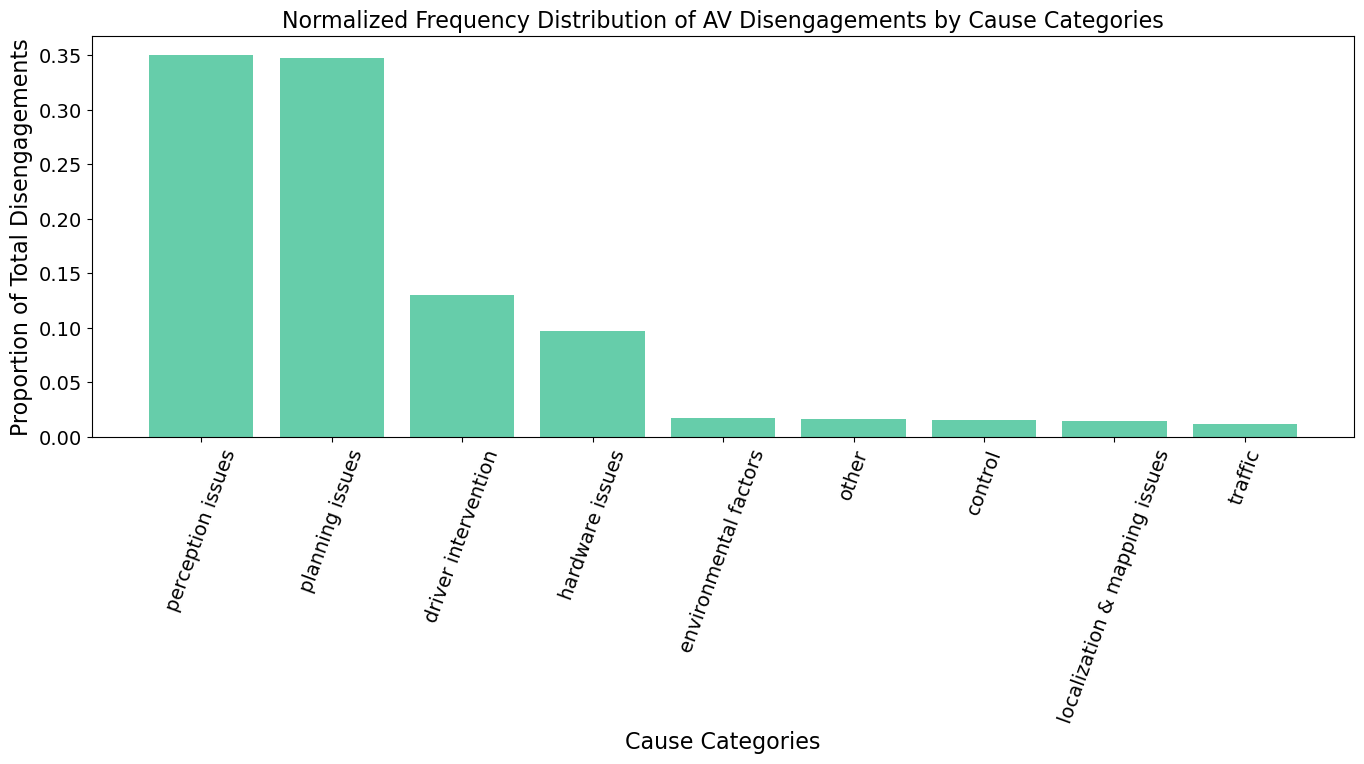

In [115]:
# Plotting the normalized frequency distribution of disengagements by manufacturer
plt.figure(figsize=(14, 8))
plt.bar(disengagement_cause_frequency['disengagement_category'], disengagement_cause_frequency['percentage'], color='mediumaquamarine')
plt.title('Normalized Frequency Distribution of AV Disengagements by Cause Categories', fontsize=16)
plt.ylabel('Proportion of Total Disengagements', fontsize=16)
plt.xticks(rotation = 70, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Cause Categories', fontsize=16)
plt.tight_layout(pad=2.0)
plt.savefig('../images/disengagements_by_cause_normalized.png')

## 8. Export to csvs

In [106]:
#export the full report for safe keeping
reports_full.to_csv('../data/reports_full_revised.csv', index=False)

In [107]:
reports_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17454 entries, 0 to 17453
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   manufacturer                17454 non-null  object
 1   permit_number               17454 non-null  object
 2   date                        17454 non-null  object
 3   vin                         17454 non-null  object
 4   capable_without_driver      17454 non-null  object
 5   driver_present              17454 non-null  object
 6   disengagement_initiated_by  17454 non-null  object
 7   disengagement_location      17454 non-null  object
 8   disengagement_description   17454 non-null  object
 9   incident_day_of_week        17454 non-null  object
 10  incident_month              17454 non-null  object
 11  disengagement_category      17454 non-null  object
dtypes: object(12)
memory usage: 1.6+ MB


In [108]:
#export the condensed version with only ['disengagement_description','disengagement_category'] columns for text classification model later in google colabs.
reports_condensed = reports_full[['disengagement_description','disengagement_category']]

In [109]:
reports_condensed.to_csv('../data/reports_condensed.csv', index=False)